In [1]:
import numpy as np
import pandas as pd

In [79]:
pd.read_csv('Weights2 - 6th  layer/Uk_weights2_X_test.csv',header=None)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.205252,0.249533,2.468264,0.000000,2.778450,1.915088,0.846388,0.330514,0.027987,0.000000,...,0.008679,0.121032,0.008315,0.031075,0.017995,0.016965,0.031257,0.885887,0.190676,0.464940
1,1.617950,0.057612,0.270210,0.006480,0.004228,0.000000,0.367086,0.169956,0.005445,0.319232,...,0.037268,0.361500,0.229228,0.870521,0.000000,0.586490,0.010039,2.016196,0.590654,0.166361
2,0.000000,0.000000,0.000000,0.008871,0.583478,0.000000,1.180211,0.228068,0.000000,0.072185,...,0.000000,0.050236,0.596071,0.007021,0.000000,0.040999,0.000000,0.394930,0.044031,0.314719
3,0.000000,0.439345,0.899247,0.614806,0.573302,0.000000,0.511731,0.006354,0.218518,0.041050,...,0.000000,1.133643,0.191010,0.000000,0.481389,1.538416,0.215585,1.294243,0.387299,0.058883
4,0.713862,0.455414,1.520771,0.060180,0.772773,0.000000,0.280808,0.460845,0.000000,0.070070,...,0.230883,1.454101,0.414433,0.295896,0.029659,0.081867,0.004096,0.072701,0.811972,0.363433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,0.253925,0.578918,0.255666,0.000000,0.109713,0.000000,0.167994,0.287934,0.015431,0.021831,...,0.219655,0.073615,0.027513,0.227227,0.028447,0.000000,0.205858,0.017773,0.603405,0.786571
6205,0.274169,0.345489,0.470278,0.258174,1.462303,0.000000,1.393906,0.034041,0.000000,0.000000,...,0.081641,0.000000,0.077804,0.000000,0.055088,0.381468,0.000000,0.611305,1.447888,0.134379
6206,2.546535,0.786237,0.159672,0.000000,0.105839,0.000000,0.043736,0.658212,0.006366,0.000000,...,0.027105,0.164124,0.443468,0.297745,0.000000,0.000000,0.000000,0.085021,2.660668,0.036462
6207,0.000000,0.218152,0.058052,0.381265,1.797887,0.000000,0.882641,0.160167,0.198532,0.000000,...,0.000000,0.103092,0.558721,1.345153,0.000000,0.000000,0.000000,1.580165,0.413328,0.000000


In [278]:
layerXtest = pd.read_csv('Weights2 - 6th  layer/Uk_weights2_X_test.csv',header=None).to_numpy()
layerYtest = pd.read_csv('Weights2 - 6th  layer/Uk_weights2_Y_test.csv',header=None).to_numpy()
layerXtrain = pd.read_csv('Weights2 - 6th  layer/Uk_weights2_X_validation.csv',header=None).to_numpy()
layerYtrain = pd.read_csv('Weights2 - 6th  layer/Uk_weights2_Y_validation.csv',header=None).to_numpy()
smXtest = pd.read_csv('Weights2 - Softmax/Uk_weights2_X_test.csv',header=None).to_numpy()
smYtest = pd.read_csv('Weights2 - Softmax/Uk_weights2_Y_test.csv',header=None).to_numpy()
smXtrain = pd.read_csv('Weights2 - Softmax/Uk_weights2_X_validation.csv',header=None).to_numpy()
smYtrain = pd.read_csv('Weights2 - Softmax/Uk_weights2_Y_validation.csv',header=None).to_numpy

#we'll include the training data too...
#smXtrain2 = pd.read_csv('Weights2 - Softmax/Uk_weights2_X_train.csv',header=None).to_numpy()
#smYtrain2 = pd.read_csv('Weights2 - Softmax/Uk_weights2_Y_train.csv',header=None).to_numpy()
#smXtrain = np.r_[smXtrain,smXtrain2]
#smYtrain = np.r_[smYtrain,smYtrain2]

In [279]:
def NLPD(actual,predicted):
    """(normalised) Negative Log Predictive Density
    Definition of Negative Log Predictive Density (NLPD):
    $$L = -\frac{1}{n} \sum_{i=1}^n \log p(y_i=t_i|\mathbf{x}_i)$$
    See http://mlg.eng.cam.ac.uk/pub/pdf/QuiRasSinetal06.pdf, page 13.
    "This loss penalizes both over and under-confident predictions."
    but
    "The NLPD loss favours conservative models, that is models that tend to be under-confident
    rather than over-confident. This is illustrated in Fig. 7, and canbe deduced from the fact that
    logarithms are being used. An interesting way ofusing the NLPD is to give it relative to the NLPD
    of a predictor that ignoresthe inputs and always predicts the same Gaussian predictive distribution,
    withmean and variance the empirical mean and variance of the training data. Thisrelative NLPD
    translates into a gain of information with respect to the simpleGaussian predictor described."
    
    actual = 2d array of indices (Nx1), values are from 0 to D-1.
    predicted = 2d array of probabilities (NxD) sum to one along rows.
    """
    assert np.max(np.abs(np.sum(predicted,1)-1))<1e-5 #confirmed every row roughly adds up to one
    assert 0<=np.max(predicted)<=1
    return -np.sum(np.log(np.take_along_axis(predicted,actual.astype(int),axis=1)))

def MNLPD(actual,predicted):
    """Mean of the NLPD"""
    assert np.max(np.abs(np.sum(predicted,1)-1))<1e-5 #confirmed every row roughly adds up to one
    assert 0<=np.max(predicted)<=1
    return -np.mean(np.log(np.take_along_axis(predicted,actual.astype(int),axis=1)))
def GMNLPD(actual,predicted):
    """Grouped Mean NLPD
    This finds the mean of the MNLPDs for all the separate actual groups.
    It means that if one large group is well classified it won't swamp the results from
    the smaller groups"""
    assert np.max(np.abs(np.sum(predicted,1)-1))<1e-5 #confirmed every row roughly adds up to one
    assert 0<=np.max(predicted)<=1
    res = []
    for i in np.unique(actual):
        res.append(MNLPD(actual[actual[:,0]==i],predicted[actual[:,0]==i,:]))
    return np.mean(res)

# CNN solution (softmax)

In [280]:
#Deep Neural network
NLPD(smYtest,smXtest)

5655.690000928037

In [281]:
#mean group means.
GMNLPD(smYtest,smXtest)

1.5655913587237136

Trying to regularise the CNN softmax solution to see if it helps (as we regularise our EUE method, so it's fair to try it here too).

In [282]:
tempX = smXtest+0.01
tempX=(tempX.T/np.sum(tempX,1)).T

In [283]:
#Deep Neural network
NLPD(smYtest,tempX)

5764.5842905439085

In [284]:
#mean group means.
GMNLPD(smYtest,tempX)

1.3017689271373074

It doesn't help the NLPD but it does help the grouped mean

# Empirical Uncertainty Estimation

Using just the confusion matrix

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline

In [286]:
preds = np.argmax(smXtrain,1)
conf = np.zeros([19,19])
for p,a in zip(preds,smYtrain[:,0].astype(int)):
    conf[p,a]+=1.0
conf+=0.01
conf = (conf.T/np.sum(conf,1)).T
#plt.matshow(conf)
#plt.colorbar()
newprobs = np.zeros_like(smXtest)
preds = np.argmax(smXtest,1)
for i,p in enumerate(preds):
    newprobs[i,:] = conf[p,:]

TypeError: 'method' object is not subscriptable

In [287]:
NLPD(smYtest,newprobs)

5263.5786170675565

In [288]:
GMNLPD(smYtest,newprobs)

2.227997621593037

Using the probabilities to build a sort of "probability confusion matrix" (this might have a name).

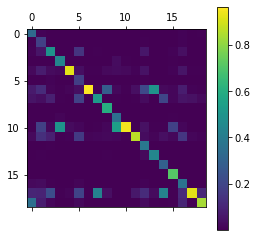

In [188]:
plt.matshow(conf.T)
plt.colorbar()

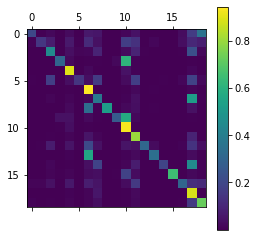

In [277]:
plt.matshow(conf)
plt.colorbar()

In [274]:
conf = np.zeros([19,19])
#count = np.zeros([19,19])
for x,a in zip(smXtrain,smYtrain[:,0].astype(int)):
    conf[:,a]+=x
    #count[:,a]+=1
    
conf = (conf.T/np.sum(conf,1)).T
#conf = (conf/np.sum(conf,0))

#conf = conf/count
#conf[conf>1]=1
#plt.matshow(conf)
#plt.colorbar()
newprobs = np.zeros_like(smXtest)
preds = np.argmax(smXtest,1)
for i,p in enumerate(preds):
    probs = smXtest[i,:]@conf
    #p = np.argmax(probs)
    newprobs[i,:] = conf[p,:]

In [275]:
NLPD(smYtest,newprobs)

5263.5786170675565

In [276]:
GMNLPD(smYtest,newprobs)

2.227997621593037

So the NLPD is reduced to 5281 from 5655 (6.6% less).

I think the benefit might be stronger in the less common speicies, it might be interesting to weight them evenly (at the moment as you mentioned it's not been rebalanced).